## Exercise 05
# Neural networks
## 4.1 Little Red Riding Hood Network
Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

# Neural Networks in Keras Little Red Riding Hood Network

# USANDO KERAS
### RAFAEL NIÑO
### SANTIAGO BARCO
<img src="http://themaleharem.com/wp-content/uploads/2014/06/Walter-crane-little-red-riding-hood-meets-the-wolf-in-the-woods.jpg">

In [964]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Neural network training in Keras

We will build a multilayer network to solve the following classification problem:

In [965]:
from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork


Dlrrh = SupervisedDataSet(4,4) 
Dlrrh.addSample([1,1,0,0],[1,0,0,0])
Dlrrh.addSample([0,1,1,0],[0,0,1,1])
Dlrrh.addSample([0,0,0,1],[0,1,1,0])

In [966]:
x_train = pd.DataFrame(Dlrrh['input'],columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
x_train

,Big Ears,Big Teeth,Handsome,Wrinkled
0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0


In [967]:
y_train = pd.DataFrame(Dlrrh['target'],columns=['Scream', 'Hug', 'Food', 'Kiss'])
y_trainini = y_train

In [968]:
y_trainini

,Scream,Hug,Food,Kiss
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,0.0


In [969]:
print (x_train.join(pd.DataFrame(Dlrrh['target'],columns=['Scream', 'Hug', 'Food', 'Kiss'])))

   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0       1.0        1.0       0.0       0.0     1.0  0.0   0.0   0.0
1       0.0        1.0       1.0       0.0     0.0  0.0   1.0   1.0
2       0.0        0.0       0.0       1.0     0.0  1.0   1.0   0.0


In [970]:
x_train
x_trainini = x_train

In [971]:
import numpy as np
## Creamos los datos de la NN
x_train = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]])
x_train

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]])

In [972]:
import numpy as np
y_train = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]])
y_train


array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [973]:

len(y_train)

3

In [974]:

len(x_train)

3

In [975]:
x_train

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]])

In [976]:
y_train

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [977]:
y_train[:,0:1]

array([[1],
       [0],
       [0]])

## MODELO USADO
### Se usa Units = 40 (40 perceptrones internos) para que se obtengan los resultados esperados

In [978]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=40, input_dim=4)) # se indica la cantidad de variables de entrada input_dim = 4, units = 20 indica la cantidad de neuronas intermedias.
model.add(Activation('relu'))
model.add(Dense(units=4))# Se indican la cantidad de variables de salida units = 4
model.add(Activation('sigmoid'))

The structured of the neural network can be visualized with:

In [979]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_70 (Dense)               (None, 40)                  200        
______________________________________________________________________
activation_68 (Activation)     (None, 40)                  0          
______________________________________________________________________
dense_71 (Dense)               (None, 4)                   164        
______________________________________________________________________
activation_69 (Activation)     (None, 4)                   0          
Total params: 364
Trainable params: 364
Non-trainable params: 0
______________________________________________________________________


The learning process is configured with `compile`. Here we will use a cross-entropy loss function and an SGD optimizer. A the learning process will keep track of the accuracy.

In [980]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

The model is trained by calling the function `fit`:

In [981]:
model.fit(x_train, y_train, epochs=100, verbose=4)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

The trained model can be use to classify new samples 
using `predict`:

## VALIDACIÓN DEL MODELO
### Valores estimados "hat"
Se publican los valores resultados de la NN


In [984]:
a = model.predict(np.array([[1,1,0,0]]))
print(model.predict(np.array([[1,1,0,0]])))

[[ 0.65190828  0.11467005  0.32426208  0.22593395]]


In [985]:
b = model.predict(np.array([[0,1,1,0]]))
print(model.predict(np.array([[0,1,1,0]])))

[[ 0.28023708  0.15271498  0.71555746  0.64552182]]


In [986]:
c = model.predict(np.array([[0,0,0,1]]))
print(model.predict(np.array([[0,0,0,1]])))

[[ 0.28982824  0.54372913  0.68050981  0.31003252]]


In [987]:
a1 = pd.DataFrame(a,columns=['Scream_hat', 'Hug_hat', 'Food_hat', 'Kiss_hat'],index=[0]) # Se colocan estos index para poder hacer join con otros dataframes.
b1 = pd.DataFrame(b,columns=['Scream_hat', 'Hug_hat', 'Food_hat', 'Kiss_hat'],index=[1])
c1 = pd.DataFrame(c,columns=['Scream_hat', 'Hug_hat', 'Food_hat', 'Kiss_hat'],index=[2])


### Publicación de los resultados en términos de Probabilidad
### Valores estimados "hat"

valores de entrada

In [988]:
x_trainini

,Big Ears,Big Teeth,Handsome,Wrinkled
0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0


Valores de salida

In [989]:
# Se crea un dataFrame con los resultados
pd.concat([a1, b1,c1])


,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,0.651908,0.114670,0.324262,0.225934
1,0.280237,0.152715,0.715557,0.645522
2,0.289828,0.543729,0.680510,0.310033


### Resultados con probabilidades estimados "hat"]

In [990]:
x_trainini.join(pd.concat([a1, b1,c1]))

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,1.0,1.0,0.0,0.0,0.651908,0.114670,0.324262,0.225934
1,0.0,1.0,1.0,0.0,0.280237,0.152715,0.715557,0.645522
2,0.0,0.0,0.0,1.0,0.289828,0.543729,0.680510,0.310033


In [991]:
a2 = a
n=4
j=0
for j in range(n):
    if a[0,j] < 0.5:
        a2[0][j] = 0
    else:
        a2[0][j] = 1
a2 = pd.DataFrame(a2,columns=['Scream_hatN', 'Hug_hatN', 'Food_hatN', 'Kiss_hatN'],index=[0])
a2

b2 = b
for j in range(n):
    if b[0,j] < 0.5:
        b2[0][j] = 0
    else:
        b2[0][j] = 1
b2 = pd.DataFrame(b2,columns=['Scream_hatN', 'Hug_hatN', 'Food_hatN', 'Kiss_hatN'],index=[1])
b2

c2 = c
for j in range(n):
    if c[0,j] < 0.5:
        c2[0][j] = 0
    else:
        c2[0][j] = 1
c2 = pd.DataFrame(c2,columns=['Scream_hatN', 'Hug_hatN', 'Food_hatN', 'Kiss_hatN'],index=[2])
c2
# Se crea un dataFrame con los resultados
pd.concat([a2, b2,c2])

,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,0.0


### Resultados con valores normalizados a 0 y 1

In [992]:
x_trainini.join(pd.concat([a2, b2,c2]))

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [993]:
resul = pd.concat([a2, b2,c2])

In [994]:
y_trainini

,Scream,Hug,Food,Kiss
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,0.0


### Comparación de Datos originales vs Estimados

In [995]:
y_trainini.values ==  pd.concat([a2, b2,c2]).values


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

### Conclusión:
Los resultados estimados son iguales a los originales, se comprueba que la NN está funcionando correctamente


Ref:

https://github.com/leriomaggio/deep-learning-keras-tensorflow/blob/master/1.%20ANN/1.1.1%20Perceptron%20and%20Adaline.ipynb

### CAMBIANDO LOS IMPUTS PARA VER OTROS RESULTADOS

### IMPUTS ORIGINALES

In [996]:
x_train

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]])

In [997]:
x_train2 =  pd.DataFrame(x_train,columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'],index=[0,1,2])
x_train2

,Big Ears,Big Teeth,Handsome,Wrinkled
0,1,1,0,0
1,0,1,1,0
2,0,0,0,1


### Publicación de valores estimados

In [998]:
z = model.predict(x_train)
print(model.predict(x_train))

[[ 0.65190828  0.11467005  0.32426208  0.22593395]
 [ 0.28023708  0.15271498  0.71555746  0.64552182]
 [ 0.28982824  0.54372913  0.68050981  0.31003252]]


In [999]:
z2 = z
n=4 # Número de filas
p=3 # Número de columnas
i=0
j=0
for i in range(p):
	for j in range(n):
		if z[i,j] < 0.5:
			z2[i][j] = 0
		else:
			z2[i][j] = 1

In [1000]:
z2

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  0.]], dtype=float32)

In [1001]:
z2 = pd.DataFrame(z2,columns=['Scream_hatN', 'Hug_hatN', 'Food_hatN', 'Kiss_hatN'],index=[0,1,2])
z2

,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,0.0


In [1002]:
# Unión de resultados
x_train2.join(z2)

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1,1,0,0,1.0,0.0,0.0,0.0
1,0,1,1,0,0.0,0.0,1.0,1.0
2,0,0,0,1,0.0,1.0,1.0,0.0


## CONCLUSIÓN DATOS ORIGINALES
a) Si tiene orejas grandes, dientes grandes, el modelo dice que grite. (ES PROBABLE LÓGICO)

b) Si tiene dientes grandes y es amable, el modelo dice que le de comida. (ES PROBABLE LÓGICO)

c) Si es arrugado, el modelo dice que lo abrace y le de comida. (ES PROBABLE LÓGICO)


# NUEVOS IMPUTS KERAS

In [1041]:
import numpy as np
x_train5 = np.array([[1,1,0,1],[0,1,0,1],[0,0,1,1]])
x_train5

array([[1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1]])

In [1042]:
x_train6 =  pd.DataFrame(x_train5,columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'],index=[0,1,2])
x_train6

,Big Ears,Big Teeth,Handsome,Wrinkled
0,1,1,0,1
1,0,1,0,1
2,0,0,1,1


### Publicación de valores estimados

In [1043]:
z6 = model.predict(x_train5)
print(model.predict(x_train5))

[[ 0.57635212  0.16735157  0.38739553  0.16132908]
 [ 0.3975637   0.2731562   0.62109375  0.35578617]
 [ 0.20665044  0.44246116  0.798931    0.45018014]]


In [1044]:

z7 = z6
n=4 # Número de filas
p=3 # Número de columnas
i=0
j=0
for i in range(p):
	for j in range(n):
		if z6[i,j] < 0.5:
			z7[i][j] = 0
		else:
			z7[i][j] = 1

In [1045]:
z7

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.]], dtype=float32)

In [1046]:
z7 = pd.DataFrame(z7,columns=['Scream_hatN', 'Hug_hatN', 'Food_hatN', 'Kiss_hatN'],index=[0,1,2])
z7

,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0


In [1047]:
# Unión de resultados
x_train6.join(z7)


,Big Ears,Big Teeth,Handsome,Wrinkled,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1,1,0,1,1.0,0.0,0.0,0.0
1,0,1,0,1,0.0,0.0,1.0,0.0
2,0,0,1,1,0.0,0.0,1.0,0.0


## CONCLUSIÓN NUEVOS DATOS
a) Si tiene orejas grandes, dientes grandes y es arruagado, el modelo dice que GRITE. (ES PROBABLE, PUDE SER EL LOBO)

b) Si tiene dientes grandes y arrugado, el modelo dice que le de comida (ES PROBABLE LÓGICO, PUES ASÍ SE ENTRENÓ EL MODELO, que con dientes grandes le de comida)

c) Si tiene cara amable y arrugado, el modelo dice que le de comida. (ES PROBABLE LÓGICO)

Ref: 
    https://github.com/leriomaggio/deep-learning-keras-tensorflow/blob/master/1.%20ANN/1.1.1%20Perceptron%20and%20Adaline.ipynb

### NOTA: Los valores estimados, pueden cambiar si se corre nuevamente el modelo, ya que usa variables aleatorias

# Neural Networks in Keras Little Red Riding Hood Network

# USANDO SKLEARN

### RAFAEL NIÑO
### SANTIAGO BARCO


<img src="https://teacordas.altervista.org/wp-content/uploads/2016/02/large_obra_infantil_caperucita_roja_corte_ingles_mendez_alvaro.jpg">

Imagen tomada de:
https://teacordas.altervista.org/wp-content/uploads/2016/02/large_obra_infantil_caperucita_roja_corte_ingles_mendez_alvaro.jpg


In [1048]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

Se visualizan los datos originales

In [1049]:
x_train

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]])

In [1050]:
y_train

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [1051]:
from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork


import numpy as np
## Creamos los datos de la NN
x_train = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]])
x_train

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]])

In [1052]:
import numpy as np
y_train = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]])
y_train


array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [1053]:
x_trainini

,Big Ears,Big Teeth,Handsome,Wrinkled
0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0


In [1054]:
y_trainini

,Scream,Hug,Food,Kiss
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,0.0


In [1055]:
x_trainini.join(y_trainini)

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Desarrollo del modelo

In [1056]:
modSK = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(40, 2), 
                    random_state=1)

In [1057]:
modSK.fit(x_train, y_train)                         


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [1058]:
modSK.predict([[1,1,0,0]])

array([[1, 0, 0, 0]])

In [1059]:
modSK.predict([[0,1,1,0]])

array([[0, 0, 1, 1]])

In [1060]:
modSK.predict([[0,0,0,1]])

array([[0, 1, 1, 0]])

In [1061]:
modSK.predict(x_train)

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

## Comparación de datos originales vs estimados

In [1062]:
modSK.predict(x_train) ==  y_trainini.values

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

### Se publican los valores estimados "hat" del resultado de la neurona

In [1063]:
resul2 = pd.DataFrame((modSK.predict(x_train)),columns=['Scream_hat', 'Hug_hat', 'Food_hat', 'Kiss_hat'],index=[0,1,2])
resul2


,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,1,0,0,0
1,0,0,1,1
2,0,1,1,0


In [1064]:
x_trainini.join(resul2)

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,1.0,1.0,0.0,0.0,1,0,0,0
1,0.0,1.0,1.0,0.0,0,0,1,1
2,0.0,0.0,0.0,1.0,0,1,1,0


## Conclusión

Se observa que los Resultados de la neurona son iguales a lo originales

## CONCLUSIÓN DATOS ORIGINALES CON SKLEARN
a) Si tiene orejas grandes, dientes grandes, el modelo dice que grite. (ES PROBABLE LÓGICO)

b) Si tiene dientes grandes y es amable, el modelo dice que le de comida. (ES PROBABLE LÓGICO)

c) Si es arrugado, el modelo dice que lo abrace y le de comida. (ES PROBABLE LÓGICO)

# NUEVOS IMPUTS CON SKLEARN


In [1065]:
import numpy as np
x_train15 = np.array([[1,1,0,1],[0,1,0,1],[0,0,1,1]])
x_train15


array([[1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1]])

In [1066]:
x_train16 =  pd.DataFrame(x_train15,columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'],index=[0,1,2])
x_train16


,Big Ears,Big Teeth,Handsome,Wrinkled
0,1,1,0,1
1,0,1,0,1
2,0,0,1,1


### Publicación de valores estimados

In [1067]:
z16 = modSK.predict(x_train15)
print(modSK.predict(x_train15))
z17 = z16

[[0 0 1 1]
 [0 1 1 1]
 [0 1 1 0]]


In [1068]:
z17

array([[0, 0, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 0]])

In [1069]:
z17 = pd.DataFrame(z17,columns=['Scream_hat', 'Hug_hat', 'Food_hat', 'Kiss_hat'],index=[0,1,2])
z17

,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,0,0,1,1
1,0,1,1,1
2,0,1,1,0


In [1070]:
# Unión de resultados
x_train16.join(z17)


,Big Ears,Big Teeth,Handsome,Wrinkled,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,1,1,0,1,0,0,1,1
1,0,1,0,1,0,1,1,1
2,0,0,1,1,0,1,1,0


## CONCLUSIÓN NUEVOS DATOS
a) Si tiene orejas grandes, dientes grandes y es arruagado, el modelo dice que le de comida y le de un beso. (NO ES LÓGICO)

b) Si tiene dientes grandes y arrugado, el modelo dice que lo abrace, le de comida y le de un beso (ES PROBABLE LÓGICO, PUES ASÍ SE ENTRENÓ EL MODELO, que con dientes grandes le de comida)

c) Si tiene cara amable y arrugado, el modelo dice que lo abrace y le de comida. (ES PROBABLE LÓGICO)

## Comparación de Resultados KERAS vs SKLEARN

Usando los mismos valores de prueba, se compararan los resultados con las 2 librerias.

### Resultados con KERAS

In [1072]:
z7

,Scream_hatN,Hug_hatN,Food_hatN,Kiss_hatN
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0


### Resultados con SKLEARN

In [1073]:
z17

,Scream_hat,Hug_hat,Food_hat,Kiss_hat
0,0,0,1,1
1,0,1,1,1
2,0,1,1,0


In [1075]:
z7.values == z17.values

array([[False,  True, False, False],
       [ True, False,  True, False],
       [ True, False,  True,  True]], dtype=bool)

# CONCLUSIÓN

Los dos modelos se comportan bien al probarlos con los datos de entrenamiento, sin embargo se deben revisar los parpametros de calibración con cada librería, con el fin que los resultados sean similares minimizando el error, a la hora de usar el modelo para hallar nuevos valores.

Con los valores de prueba, los dos modelos mostraron un resultado coherente.




## 4.2 Boston House Price Prediction

<img src="https://i.ytimg.com/vi/suw63h_LQbU/maxresdefault.jpg">

Imagen tomada de:
https://i.ytimg.com/vi/suw63h_LQbU/maxresdefault.jpg

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

In [116]:
# 1.

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

boston = load_boston()
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)


In [117]:
# 2.
data = pd.DataFrame(boston.data)
print(data.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [118]:
# 3.
data.columns = boston.feature_names
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [119]:
# 4.
data['MEDV'] = boston.target
print(data.head())
data.shape

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


(506, 14)

In [120]:
# 5.
print(data['MEDV'].describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [121]:
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [122]:
# Filter the dataset to just these features:
#       Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
#       Dependent: 'MEDV'.

new_data = ['LSTAT','INDUS','NOX', 'RM', 'AGE','MEDV']
new_data=data[new_data]
print(new_data.head())

   LSTAT  INDUS    NOX     RM   AGE  MEDV
0   4.98   2.31  0.538  6.575  65.2  24.0
1   9.14   7.07  0.469  6.421  78.9  21.6
2   4.03   7.07  0.469  7.185  61.1  34.7
3   2.94   2.18  0.458  6.998  45.8  33.4
4   5.33   2.18  0.458  7.147  54.2  36.2


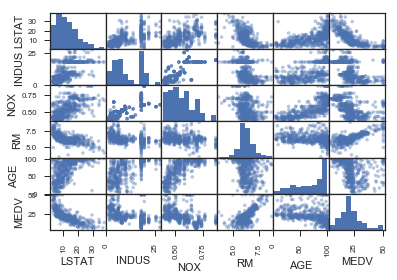

In [123]:
# Generate a scatter matrix among the features mentioned above using Pandas (scatter_matrix) or Seaborn (pairplot).
#     Do you find any relationship between the features?
from pandas.plotting import scatter_matrix

scatter_matrix(new_data, alpha=0.4)
print()
plt.show()

Graficamente se podria determinar que las siguietnes variables tienen correlaciones con la variable dependiente:
    - RM
    - LSTAT

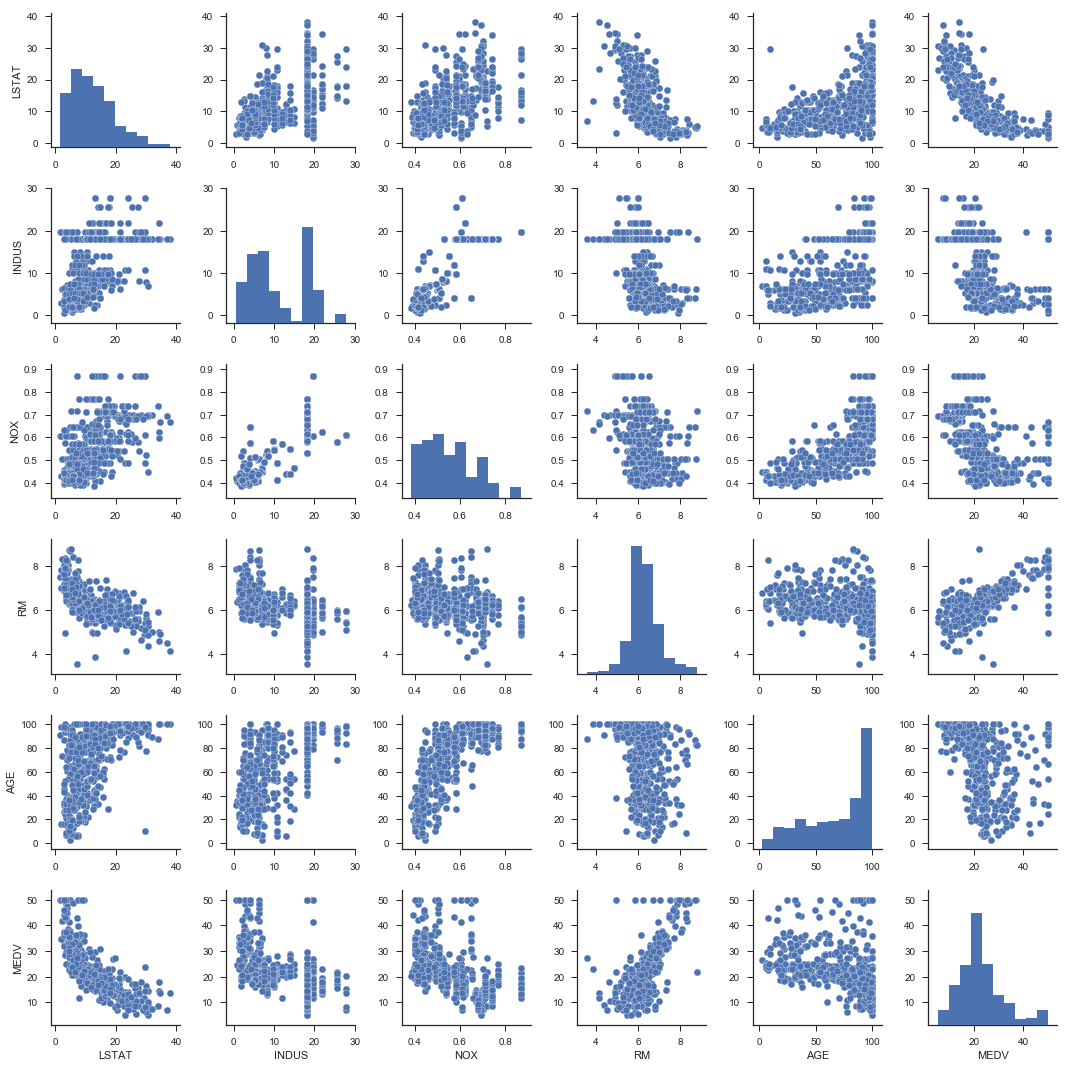

In [124]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(new_data)
print()
plt.show()

Se hace uso de otra libreria con el fin de poder observar con mas calidad los datos. Se encuentran las mismas relaciones con la variable dependiente [RM , LSTAT] 


Adicional a esto, se pueden observar algunas varibles que marcan algunas tendencias, como lo son:
* LSTAT - RM
* NOX - AGE

In [125]:
#Generate the correlation matrix between these variables using numpy.corrcoef. Also include MEDV.
  #Which characteristics are more correlated?

In [131]:
from numpy import *
Cor_Matrix = np.corrcoef(new_data,y=None)
Cor_Matrix

array([[ 1.        ,  0.99075004,  0.97819441, ...,  0.98581972,
         0.98307924,  0.95808787],
       [ 0.99075004,  1.        ,  0.94982287, ...,  0.99668853,
         0.99682335,  0.98682013],
       [ 0.97819441,  0.94982287,  1.        , ...,  0.94907484,
         0.942261  ,  0.89591008],
       ..., 
       [ 0.98581972,  0.99668853,  0.94907484, ...,  1.        ,
         0.99973225,  0.98987793],
       [ 0.98307924,  0.99682335,  0.942261  , ...,  0.99973225,
         1.        ,  0.99280619],
       [ 0.95808787,  0.98682013,  0.89591008, ...,  0.98987793,
         0.99280619,  1.        ]])

In [144]:
Cor_Matrix = new_data.corr()
Cor_Matrix

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


Al generar la matriz de correlación se evidencia que las sigueintes variables tienen una alta correlación con la variable dependiente:

- LSTAT: -0.73766
- RM: -0.695360

Haciendo el analisis de las vatibles restantes se encuentran correlaciones fuertes entre las siguientes variables:

- AGE - LSTAT: 0.602339
- AGE - INDUS: 0.644779
- AGE - NOX: 0.731470
- RM - LSTAT: -0.613808
- INDUS - NOX: 0.763651
- INDUS - LSTAT: 0.603800

In [142]:
#https://mashimo.wordpress.com/2013/12/01/covariance-and-correlation/

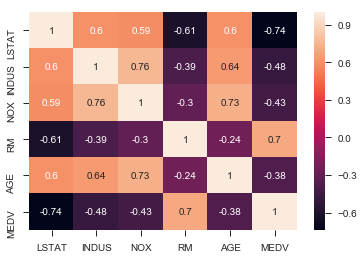

In [147]:
#BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

sns.heatmap(Cor_Matrix, annot=True)

Haciendo uso del diagrama de calor, se puede ver que las variables de mas alto impacto en relacion negativa son las vaables que tienden a tener un color oscuro, y en cuanto a la relación positiva se pueden interpretar las de mas fuerte impacto con las areas de color claro.

Para la variable MEDV, las dos variables que continuan teniendo mayor efecto es LSTAT y RM

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $


* $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

Se procede con a construcción de la base segun las instrucciones planteadas por el ejercicio:

In [159]:
df1 = ['RM','MEDV']
df1= data[df1]
df1.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


Teniendo la base lista, se procedera con la partición de la misma es Test y Train con un peso respectivo de 0.3 y 0.7

In [165]:
from sklearn.model_selection import train_test_split
df1_train, df1_test = train_test_split(df1, test_size=0.3,random_state=3)

print(df1_train.head())
print(df1_train.shape)
print()
print(df1_test.head())
print(df1_test.shape)

        RM  MEDV
359  6.112  22.6
374  4.138  13.8
98   7.820  43.8
273  7.691  35.2
329  6.333  22.6
(354, 2)

        RM  MEDV
224  8.266  44.8
137  6.454  17.1
453  7.393  17.8
303  6.982  33.1
254  6.108  21.9
(152, 2)


* $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

Se repite el procedimiento para la otra base:

In [156]:
df2 = ['LSTAT','MEDV']
df2= data[df2]
df2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [166]:
from sklearn.model_selection import train_test_split
df2_train, df2_test = train_test_split(df2, test_size=0.3,random_state=3)

print(df2_train.head())
print(df2_train.shape)
print()
print(df2_test.head())
print(df2_test.shape)

     LSTAT  MEDV
359  12.67  22.6
374  37.97  13.8
98    3.57  43.8
273   6.58  35.2
329   7.34  22.6
(354, 2)

     LSTAT  MEDV
224   4.14  44.8
137  14.59  17.1
453  16.74  17.8
303   4.86  33.1
254   6.57  21.9
(152, 2)


Luego de tener listas las dos bases, se procedera con el desarrollo del modelo de regresión lineal.

* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data


In [198]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

lr1= LinearRegression()
lr2= LinearRegression()

### Linear Regression 1

In [199]:
x1_train = df1_train['RM']
y1_train = df1_train['MEDV']
x1_train = x1_train.values.reshape(-1, 1)
y1_train = y1_train.values.reshape(-1, 1)

In [251]:
lr1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
from sklearn import metrics
import numpy as np

y_pred_df1 = lr1.predict(df1_test[['RM']])
print('MSE-DF1:', metrics.mean_squared_error(df1_test['MEDV'], y_pred_df1))

MSE-DF1: 37.2347884135


In [201]:
print('w: ',lr1.coef_)
print('w_0:',lr1.intercept_)

w:  [[ 9.29659592]]
w_0: [-35.74323818]


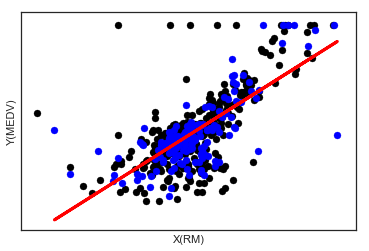

In [222]:
import matplotlib.pyplot as plt

plt.scatter(df1_train['RM'], df1_train['MEDV'],  color='black')
plt.scatter(df1_test['RM'], df1_test['MEDV'],  color='blue')
plt.plot(df1_test['RM'], y_pred_df1, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('X(RM)')
plt.ylabel('Y(MEDV)')
plt.show()

Graficamente se evidencia que la regresión aunque parece que toma la tendencia de los puntos, en definitiva muchas de estas observaciones terminan convirtiendose en outliers respecto a la regresión. Por lo mismo se hace evidente que el MSE es alto.

In [223]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

### Linear Regression 2

In [202]:
x2_train = df2_train['LSTAT']
y2_train = df2_train['MEDV']
x2_train = x2_train.values.reshape(-1, 1)
y2_train = y2_train.values.reshape(-1, 1)

In [203]:
lr2.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
from sklearn import metrics
import numpy as np

y_pred_df2 = lr2.predict(df2_test[['LSTAT']])
print('MSE-DF2:', metrics.mean_squared_error(df2_test['MEDV'], y_pred_df2))

MSE-DF2: 40.3988707113


In [204]:
print('w: ',lr2.coef_)
print('w_0:',lr2.intercept_)

w:  [[-0.97952869]]
w_0: [ 35.04238673]


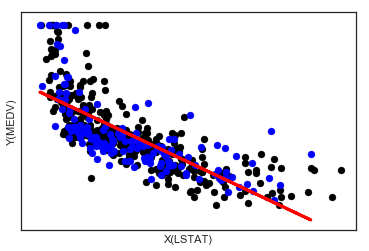

In [225]:
import matplotlib.pyplot as plt

plt.scatter(df2_train['LSTAT'], df1_train['MEDV'],  color='black')
plt.scatter(df2_test['LSTAT'], df1_test['MEDV'],  color='blue')
plt.plot(df2_test['LSTAT'], y_pred_df2, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('X(LSTAT)')
plt.ylabel('Y(MEDV)')
plt.show()

La regresion tiene a descentrarse un poco de la nube que mayor participación tiene, este efecto puede ser generado por los datos encontrados en la parte superior, que para esta grafica terminaran convitiendose en outliers.  

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

In [233]:
from sklearn import metrics
import numpy as np
print('MSE-DF1:', metrics.mean_squared_error(df1_test['MEDV'], y_pred_df1))
print('MSE-DF2:', metrics.mean_squared_error(df2_test['MEDV'], y_pred_df2))

MSE-DF1: 37.2347884135
MSE-DF2: 40.3988707113


De escoger alguno de los dos modelos, se dispondria a escoger el modelo que menor MSE tenga, por tal razon se escoge el Modelo 1 que tiene mejores resultados.

## 4.5 Training a regression model


<img src="https://www.python-course.eu/images/mlp_example_layer.png">

Tomado de:
https://www.python-course.eu/images/mlp_example_layer.png

## 4.5A Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

In [244]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3,random_state=3)

print(train.head())
print(train.shape)
print()
print(test.head())
print(test.shape)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
359   4.26131   0.0  18.10   0.0  0.770  6.112   81.3  2.5091  24.0  666.0   
374  18.49820   0.0  18.10   0.0  0.668  4.138  100.0  1.1370  24.0  666.0   
98    0.08187   0.0   2.89   0.0  0.445  7.820   36.9  3.4952   2.0  276.0   
273   0.22188  20.0   6.96   1.0  0.464  7.691   51.8  4.3665   3.0  223.0   
329   0.06724   0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   

     PTRATIO       B  LSTAT  MEDV  
359     20.2  390.74  12.67  22.6  
374     20.2  396.90  37.97  13.8  
98      18.0  393.53   3.57  43.8  
273     18.6  390.77   6.58  35.2  
329     16.9  375.21   7.34  22.6  
(354, 14)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
224  0.31533   0.0   6.20   0.0  0.504  8.266  78.3  2.8944   8.0  307.0   
137  0.35233   0.0  21.89   0.0  0.624  6.454  98.4  1.8498   4.0  437.0   
453  8.24809   0.0  18.10   0.0  0.713  7.393  99.3  2.4527  24.0  666.0   


In [245]:
X_train = train.drop('MEDV', axis = 1)
Y_train = train['MEDV']

In [246]:
print(X_train.head())
print(X_train.shape)
print()
print(Y_train.head())
print(Y_train.shape)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
359   4.26131   0.0  18.10   0.0  0.770  6.112   81.3  2.5091  24.0  666.0   
374  18.49820   0.0  18.10   0.0  0.668  4.138  100.0  1.1370  24.0  666.0   
98    0.08187   0.0   2.89   0.0  0.445  7.820   36.9  3.4952   2.0  276.0   
273   0.22188  20.0   6.96   1.0  0.464  7.691   51.8  4.3665   3.0  223.0   
329   0.06724   0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   

     PTRATIO       B  LSTAT  
359     20.2  390.74  12.67  
374     20.2  396.90  37.97  
98      18.0  393.53   3.57  
273     18.6  390.77   6.58  
329     16.9  375.21   7.34  
(354, 13)

359    22.6
374    13.8
98     43.8
273    35.2
329    22.6
Name: MEDV, dtype: float64
(354,)


In [247]:
X_test = test.drop('MEDV', axis = 1)
Y_test = test['MEDV']

In [248]:
print(X_test.head())
print(X_test.shape)
print()
print(Y_test.head())
print(Y_test.shape)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
224  0.31533   0.0   6.20   0.0  0.504  8.266  78.3  2.8944   8.0  307.0   
137  0.35233   0.0  21.89   0.0  0.624  6.454  98.4  1.8498   4.0  437.0   
453  8.24809   0.0  18.10   0.0  0.713  7.393  99.3  2.4527  24.0  666.0   
303  0.10000  34.0   6.09   0.0  0.433  6.982  17.7  5.4917   7.0  329.0   
254  0.04819  80.0   3.64   0.0  0.392  6.108  32.0  9.2203   1.0  315.0   

     PTRATIO       B  LSTAT  
224     17.4  385.05   4.14  
137     21.2  394.08  14.59  
453     20.2  375.87  16.74  
303     16.1  390.43   4.86  
254     16.4  392.89   6.57  
(152, 13)

224    44.8
137    17.1
453    17.8
303    33.1
254    21.9
Name: MEDV, dtype: float64
(152,)


* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

In [252]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

lr3= LinearRegression()

lr3.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [253]:
from sklearn import metrics
import numpy as np

y_pred_3 = lr3.predict(X_test)
print('MSE-DF3:', metrics.mean_squared_error(Y_test, y_pred_3))

MSE-DF3: 22.4397954251


* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor()

clf.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [270]:
from sklearn import metrics
import numpy as np

y_pred_4 = clf.predict(X_test)
print('MSE-DF4:', metrics.mean_squared_error(Y_test, y_pred_4))

MSE-DF4: 93.5557385496


### CONCLUSIÓN DATOS SIN ESCALAR

Para este caso, el modelo que mejor predice la variable dependiente es el modelo de regresion linel donde se hace uso de todas las variables. Esto se determina ya que el MSE es menor **MSE-DF3: 22.4397954251**.

Para este caso, se esta corriendo el modelo de MLPRegressor sin ninguna configuración previa, ya que en el siguiente punto se realizara dicha configuración.

## 4.5B Training a regression model con datos escalados

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

# Con los Datos Escalados

* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

In [49]:
# Datos sin escalar
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [42]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Se separan los datos X de la variable y

In [43]:
Y = data['MEDV']
print(data.shape)
print(Y.shape)
Y.head()

(506, 14)
(506,)


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [45]:
X = data.drop('MEDV', 1)
print(data.shape)
print(X.shape)
X.head()

(506, 14)
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Separación en TEST y TRAIN

### Generate a 70-30 partitioning of the data using all the features. (Do not include the dependent variable MEDV)

In [65]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.3,random_state=3)

In [70]:
print(data.shape)
print(data_train.shape)
data_train.head()


(506, 14)
(354, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
359,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6


In [73]:
print(data.shape)
print(data_test.shape)
data_test.head()

(506, 14)
(152, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1
453,8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74,17.8
303,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,33.1
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9


In [100]:
X_train = data_train.drop('MEDV', 1)
X_test = data_test.drop('MEDV', 1)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [175]:
Y_train = data_train['MEDV']
Y_test = data_test['MEDV']
print(Y_train.shape)
print(Y_test.shape)


(354,)
(152,)


## Escalamiento de las variables

In [102]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [104]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
359,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


In [113]:
X_train_s

array([[  7.77279051e-02,  -4.87722365e-01,   1.01599907e+00, ...,
          8.06575835e-01,   3.73511485e-01,   2.37408957e-03],
       [  1.73543866e+00,  -4.87722365e-01,   1.01599907e+00, ...,
          8.06575835e-01,   4.41051933e-01,   3.54877081e+00],
       [ -4.08916484e-01,  -4.87722365e-01,  -1.20328208e+00, ...,
         -2.10621649e-01,   4.04102045e-01,  -1.27320734e+00],
       ..., 
       [ -3.96241076e-01,   4.56508133e-01,  -7.69931321e-01, ...,
          2.97977093e-01,   4.06404560e-01,  -8.54087727e-01],
       [ -2.87272852e-01,  -4.87722365e-01,   1.23194490e+00, ...,
         -1.73641788e+00,  -1.46856963e-01,  -7.47214913e-02],
       [  9.83424547e-03,  -4.87722365e-01,   1.01599907e+00, ...,
          8.06575835e-01,   2.64416119e-01,  -3.45256893e-01]])

## REGRESIÓN LINEAL CON DATOS ESCALADOS
* Train the following models:
     ### 1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set

In [126]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

lrs1= LinearRegression()
#http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

In [127]:
lrs1.fit(X_train_s,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
from sklearn import metrics
import numpy as np
Y_pred_s1 = lrs1.predict(X_test_s)

In [159]:
print('MSE-LINEAL_ESCALADO:', metrics.mean_squared_error(Y_pred_s1,Y_test))


MSE-LINEAL_ESCALADO: 22.4397954251


In [130]:
lrs1.intercept_

22.631424094026865

In [131]:
lrs1.coef_

array([-1.10702312,  1.07768224, -0.37144572,  0.97236536, -1.44142438,
        2.61669952,  0.20748386, -2.51492522,  2.43694779, -1.30548589,
       -1.78890528,  1.14308169, -3.97110004])

In [132]:
print('wn: ',lrs1.coef_)
print('w_0:',lrs1.intercept_)
#http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

wn:  [-1.10702312  1.07768224 -0.37144572  0.97236536 -1.44142438  2.61669952
  0.20748386 -2.51492522  2.43694779 -1.30548589 -1.78890528  1.14308169
 -3.97110004]
w_0: 22.631424094


### REGRESIÓN CON PERCEPTRÓN DATOS ESCALADOS
* Train the following models:
     ###  2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set


http://scikit-learn.org/stable/modules/neural_networks_supervised.html

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


### Configuración Modelo
Se configura identity, por que es para regresion lineal
‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
The solver for weight optimization.

solver: ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
learning_rate = 'adaptive', no se usa. Only used when solver=’sgd’
shuffle : bool, optional, default True
Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor


### Se configura con hidden_layer_sizes=(128, 512)  MultiLayer Perceptron (128 neurons in the first and 512 in the second)

Datos escalados con la variables X_train_s

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

#a = clf.fit(X, y)

#Definición del alpha
#http://scikit-learn.org/stable/modules/neural_networks_supervised.html
#https://www.python-course.eu/neural_networks_with_scikit.php
#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/
#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/

In [200]:
clf.fit(X_train_s, Y_train)  

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [201]:
Y_pred_sMLP = clf.predict(X_test_s)
Y_pred_sMLP.shape


(152,)

In [202]:
print('MSE-MPL_ESCALADO:', metrics.mean_squared_error(Y_pred_sMLP,Y_test))

MSE-MPL_ESCALADO: 21.6614784198


#### COMPARACIÓN DE MODELOS
* Train the following models:
         * Report the mean square error on the test set
     ###   3. Which model has better performance? Why?

In [203]:
print('MSE-LINEAL_ESCALADO:', metrics.mean_squared_error(Y_pred_s1,Y_test))
print('MSE-MPL_ESCALADO:', metrics.mean_squared_error(Y_pred_sMLP,Y_test))

MSE-LINEAL_ESCALADO: 22.4397954251
MSE-MPL_ESCALADO: 21.6614784198


### CONCLUSIÓN

Al comparar los dos MSE con los datos escalados se encuentra con los valores son muy similares, siendo mejor el desarrollado por MPL, sin embargo es un modelo no interpretativo, que no me indica el efecto de cada una de las variablesn X sobre Y.

Es importante en los métodos no interpretativos, revisar al cuidado los diferentes parámetros de calibración, ya que ello puede resultar en un mejor o peor modelo comparado con algoritmos menos estructurados.

Respecto al  MSE-DF3: 22.4397954251, con los datos sin escalar, sigue siendo mayor al obtenido por MPL, sin embargo muy cercano a la regresión lineal escalada.

Es interesante notar que el MSE son datos sin escalar y con datos escalados, son muy similares, esto teniendo en cuenta que son variables numéricas, y se uso el modelo con la misma semilla para el random, lo que da garantía de un correcto uso del modelo.



